
# Tutorial 4 - Calculating Significance by Monte Carlo

In the homework you should have found the correlation coefficients for some data.  
The Pearson Correlation Coefficient is
\begin{align}
r_{xy} = \frac{1}{N}\frac{ \sum_i (x_i - \bar{x} ) (y_i - \bar{y}) }{ \sqrt{ S^2_x S^2_y} }
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N}\sum_i x_i ~~~~ S^2_x = \frac{1}{(N-1)} \sum_i ( x_i - \bar{x} )
\end{align}

A non-zero $r_{xy}$ should indicate that there is a correlation between $x$ and $y$.
$r_{xy}$ is an estimator of the populations true correlation coefficient
\begin{align}
\rho_{xy} = \frac{C_{XY}}{\sqrt{\sigma^2_x \sigma_y^2} }
\end{align}

But $r_{xy}$ is a function of random variables so we would not expect it to be exactly 0 
even if there were no correlations.  We could try to calculate the probability distribution of 
$r_{xy}$ analytically, but this might be difficult (more on this in lecture).

##  Monte Carlo

Instead lets find the significance of your measured $r_{xy}$ by Monte Carlo given the hypothesis that 
$x$ and $y$ are not correlated.


1. Create two vectors (X and Y) of random normally distributed numbers with variance 1 and mean zero.  Each vector should be 1000 elements long as was the data in the homework.  Calculate $r_{xy}$ for these.  X and Y 
are uncorrelated since they where generated independently.

2. Repeat step 1 a thousand times to get a distribution of $r_{xy}$.  You should to this in a loop.  There is no reason to save all the X's and Y's.

3. Plot a histogram of your  $r_{xy}$ values.  Does it look Gaussian?

4. What is the fraction of times $|r_{xy}|$ is larger than 0.025, 0.05, 0.08?  Would you expect to get this value if there were no correlation? Calculate the rxy for the homework set homework_01_2d-datafile.csv?  Would you expect to get this value if there were no correlation?

5. Do the exercise above over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y variables.   Plot the new histogram of $r_{xy}$ over the old one.   Is there a difference or is the distribution of $r_{xy}$ independent of the averages and variances of the distributions?

6. Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability distribution is larger than it.  For example the 95\% upper bound would be at $i/N = 0.95$.  What is the 95\% upper bound on $r_{xy}$ if there is no correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
In lecture we will find that the variance in this estimator is
\begin{align}
Var[r_p] = \frac{2 p (1-p) }{N f(r_p)^2 }
\end{align}
for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one you measure, what is the variance in your estimate of $r_{0.95}$?

7. Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  There are Python functions for calculating them efficiently.  These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ (in this case Gaussian) and are thus more widely applicable.  Do they indicate that the data in the home work is correlated?


In [73]:
#Tutorial # 04
## Calculating Significance by Monte Carlo
##
## More complete directions for this tutorial are in tut4.pdf
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
#1) Calculate two vectors (X and Y) of random normally distributed numbers 
#   with variance 1 and mean zero.  Each vector should be 1000 elements long 
#   as was the data in the homework.  Calculate $r_{xy}$ for these.

X=np.random.normal(0.0,1,1000)
Y=np.random.normal(0.0,1,1000)
data=np.array([X,Y]).T
def r_xy(data):
    mean_vec = np.mean(data, axis=0)
    S_x2=np.sum((data[:,0]-mean_vec[0])**2)/(len(data)-1)
    S_y2=np.sum((data[:,1]-mean_vec[1])**2)/(len(data)-1)
    r_xy = np.dot((data[:,0] - mean_vec[0]),(data[:,1] - mean_vec[1]).T) / (len(data)*np.sqrt(S_x2*S_y2))
    return r_xy
print('Pearson correlation coefficient is:',r_xy(data))

Pearson correlation coefficient is: -0.0060707285617371464


In [4]:
#2) Repeat step 1 a thousand times to get a distribution of $r_{xy}$ for a sample 
#   size equal to that of the homework.
value_r=[]
for n in range(len(data)):
    X=np.random.normal(0.0,1,1000)
    Y=np.random.normal(0.0,1,1000)
    data=np.array([X,Y]).T
    corr=r_xy(data)
    value_r.append(corr)
print(value_r)
     

[0.026863319738335303, -0.0007320372954090079, 0.05112494452477536, 0.06485977595188859, 0.011906501536466333, 0.026614274177898356, 0.03223827804718374, 0.01170633990528747, -0.06207777328709687, -0.01364251944119836, 0.011834659429755342, -0.012068609508801911, 0.022685788552685143, -0.021390374576151786, -0.04786065192348801, -0.035329280344414196, 0.0019292173283832095, -0.04022509049514982, 0.022878442450568883, -0.04451918424718294, 0.018710917341085157, 0.028128738584728318, 0.007721133685912999, 0.002555889517698981, -0.027050024274292185, 0.016734591575772045, -0.019347988404193182, 0.00937214342599489, 0.026871562392266506, 0.017792713335369532, 0.04921210010664303, 0.008050462569586112, 0.06962410524769333, -0.005072210831129178, -0.06478754860853078, -0.003635023364312392, 0.02223479106176532, -0.01455988394487373, 0.02562563428749279, 0.010277694736251713, 0.011707807851300421, 0.02084937600945145, -0.0731738560050343, 0.020149462597203564, 0.019696011438411494, -0.0536551

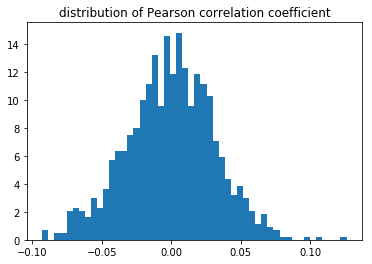

In [82]:
#3) Plot a histogram of your  $r_{xy}$ values.
plt.hist(value_r,bins=50,normed=True)
plt.title('distribution of Pearson correlation coefficient')
plt.show()


In [54]:
#4) What is the fraction of times $|r_{xy}|$ is larger than 0.025, 0.05, 0.08? 
#Would you expect to get this value if there were no correlation? Calculate the rxy for the homework set 
#homework_01_2d-datafile.csv? Would you expect to get this value if there were no correlation?

times=[]
for n in range(len(value_r)):
    if abs(value_r[n])>0.025:
        times.append(value_r[n])                        
print('fraction of times r_xy is larger than 0.025:', len(times)/1000) 


numb=[]
for n in range(len(value_r)):
    if abs(value_r[n])>0.05:
        numb.append(value_r[n]) 
print('fraction of times r_xy is larger than 0.05:', len(numb)/1000)

numb=[]
for n in range(len(value_r)):
    if abs(value_r[n])>0.08:
        numb.append(value_r[n]) 
print('fraction of times r_xy is larger than 0.08:', len(numb)/1000)


File='homework_01_2d-datafile.csv'
df=pd.read_csv(File)
df = pd.read_csv('homework_01_2d-datafile.csv', usecols=['X','Y'])
mean_vec = np.array(np.mean(df))    #mean value of df
a=np.array(df-mean_vec)         #difference between df and its mean value
S_x2=np.sum((a[:,0]-mean_vec[0])**2)/(len(a)-1)
S_y2=np.sum((a[:,1]-mean_vec[1])**2)/(len(a)-1)
r_xy = np.dot((a[:,0] - mean_vec[0]),(a[:,1] - mean_vec[1]).T) / (len(a)*np.sqrt(S_x2*S_y2))
print('Pearson correlation coefficient for homework set:',r_xy)






fraction of times r_xy is larger than 0.025: 0.416
fraction of times r_xy is larger than 0.05: 0.112
fraction of times r_xy is larger than 0.08: 0.009
Pearson correlation coefficient for homework set: -0.04949420456438061


[0.00039489283912789275, 0.014932815823202751, -0.008798445281086266, -0.003737607005938393, -0.023516475962170432, 0.06012990749638738, 0.0823091141042565, 0.01660225686247436, 0.014852331522836153, -0.004882799116538782, -0.00028719281087263, -0.05585926902620579, -0.02674736988366588, 0.07262454378674878, 0.04464613285999356, -0.010342610457237694, -0.038293559093692524, 0.009257870016278183, 0.013630119779044344, -0.011878912525746863, -0.0009144660811485538, -0.00380949775654738, 0.032701136267136485, 0.018252053928393977, -0.00594137951279897, 0.014845232792628749, -0.016212997182301514, -0.0326186357596874, -0.019382573288037348, 0.005097505710305454, -0.009391835473664541, 0.0022425440052846334, -0.0017748380968354875, -0.0248470755256227, 0.011309772869301104, -0.03488244766672057, -0.005478949996273259, 0.007172456632048317, 0.012645040649337953, -0.02452214030129417, -0.023055596383139178, -0.05635320456269586, 0.020334105180162116, 0.005882496504541872, -0.05684229857260142

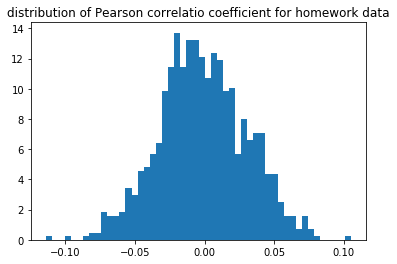

In [81]:

#5) Do the exersize over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ 
#   and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y 
#   variables.  Does this make any difference?

distr=[]
for n in range(len(df)):
    X=np.random.normal(mean_vec[0],np.sqrt(S_x2), 1000)
    Y=np.random.normal(mean_vec[1],np.sqrt(S_y2), 1000)
    data1=np.array([X,Y]).T
    r_xy = np.dot((data1[:,0] - mean_vec[0]),(data1[:,1] - mean_vec[1]).T) / (len(data1)*np.sqrt(S_x2*S_y2))
    distr.append(r_xy)
print(distr)
plt.hist(distr, bins=50, normed=True)
plt.title('distribution of Pearson correlatio coefficient for homework data')
plt.show()


In [72]:
#Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th 
#   value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability 
#   distribution is larger than it.  For example the 95\% upper bound would be 
#   at i/N = 0.95.  What is the 95% upper bound on $r_{xy}$ if there is not 
#   correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
#   In lecture we will find that the variance in this estimator is
#
#   Var[r_p] = \frac{ 2 p (1-p) }{N f(r_p)^2 }
#
#   for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
#   Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one 
#   you measure, what is the variance in your estimate of $r_{0.95}$?


distr.sort()
r_950=distr[949]
print('r_{0.95}:',r_950)
var_r=np.var(distr)   #variance of r_{xy}
sigma=np.sqrt(var_r)
mu=np.mean(distr)
print('var:',var_r,'\n mu:',mu)
p = np.exp(-0.5*((r_950-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma); print(p)
var_rp=2.0*0.95*(0.5)/(1000.0*p**2)
print('the variance in your estimate of r_{0.95} is:', var_rp)

r_{0.95}: 0.050200493869092165
var: 0.0010831775349734601 
 mu: -0.001583504515205929
3.5154171345127976
the variance in your estimate of r_{0.95} is: 7.687229993915665e-05


In [ ]:
#7) Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  
#   There are Python functions for calculating them efficiently.  
#   These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ 
#   (in this case Gaussian) and are thus more widely applicable.  
#   Do they indicate that the data in the home work is correlated?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#1) two vectors (X and Y) of random normally distributed numbers with variance 1 and mean zero.
X=np.random.normal(0.0,1,1000)
Y=np.random.normal(0.0,1,1000)
data=np.array([X,Y]).T
sp_corr=st.spearmanr(data,axis=0)    #calcolate Spearmanr correlation coefficient
print(sp_corr)
ke_corr=st.kendalltau(X,Y)
print(ke_corr)


#2) Repeat step 1 a thousand times to get a distribution of Spearmanr and Kendall correlation coefficients for a sample 
#   size equal to that of the homework.
sp_values=[]
ke_values=[]
for n in range(len(data)):
    X=np.random.normal(0.0,1,1000)
    Y=np.random.normal(0.0,1,1000)
    data=np.array([X,Y]).T
    corr_sp=st.spearmanr(data,axis=0)
    sp_values.append(corr_sp[0])
    corr_ke=st.kendalltau(X,Y)
    ke_values.append(corr_ke[0]) 
print(sp_values,ke_values) 

#3) Plot a histogram of Spermanr and Kendal correlation coefficients
plt.hist(sp_values, normed=True, label='distribution Spearmanr correlation coefficient')
plt.hist(ke_values, normed=True, color='red', label='distribution of Kendall correlation coefficients')
plt.legend()
plt.show()


